In [ ]:
import numpy as np
import tifffile as tiff
import cv2
import os
import sys
import time
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# sys.exit(0)

## Main code

### Data read and display

#### functions

In [ ]:
def display_video(video):
    num_frames, height, width = video.shape
    print(f"the frame number is {num_frames};\n"
        f"the height is {height};\n"
        f"the width is {width}.")

    # Start the timer
    start_time = time.time()

    # Create an output widget to display the images
    out = widgets.Output()

    # Display the output widget
    display(out)

    # Iterate over each frame and display the corresponding image
    for i in range(num_frames):
        with out:
            # Clear the previous output
            out.clear_output(wait=True)

            # Create a new figure and axis for displaying the image
            fig, ax = plt.subplots(figsize=(13, 8))

            # Display the image from the current frame
            ax.imshow(video[i], cmap='gray') # map to 0 to 1 for images

            # Remove the axis ticks and labels for cleaner visualization
            ax.axis('off')

            # Show the plot
            plt.show()

        # Wait for a short duration (e.g., 0.1 seconds) to mimic video playback
        time.sleep(0.002)

    # End the timer
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Print the elapsed time
    print(f"Elapsed time: {elapsed_time} seconds")


def display_image(image):
    fig, ax = plt.subplots(figsize=(13, 8))
    ax.imshow(image, cmap='gray') # map to 0 to 1 for images
    ax.axis('off')
    plt.show()

#### code

In [ ]:
# read all kinds of data: green, green cleaned, red, red clean

folder_path = '/content/drive/MyDrive/Fluorescence_Data'
# file_list = os.listdir(folder_path)

green = 'CL090_230515_004_reg_f00000_greendemonsreg1demonsreg2.tif'
green_clean = 'CL090_230515_004_reg_f00000_greendemonsreg1demonsreg2_cleaned3.tif'
red = 'CL090_230515_004_reg_f00000_reddemonsreg1demonsreg2_cleaned3.tif'
red_clean = 'CL090_230515_004_reg_f00000_reddemonsreg1demonsreg2.tif'

file_path_green = os.path.join(folder_path, green)
file_path_green_clean = os.path.join(folder_path, green_clean)
file_path_red = os.path.join(folder_path, red)
file_path_red_clean = os.path.join(folder_path, red_clean)

video_green = tiff.imread(file_path_green)
video_green_clean = tiff.imread(file_path_green_clean)
video_red = tiff.imread(file_path_red)
video_red_clean = tiff.imread(file_path_red_clean)

videos = [video_green, video_green_clean, video_red, video_red_clean]

for video in videos:
  print('--- * ---')
  print(type(video))
  print(video.shape)
  # print(video[0])
  print(np.min(video), np.max(video))
  print('--- * ---')

--- * ---
<class 'numpy.ndarray'>
(500, 512, 796)
0 58838
--- * ---
--- * ---
<class 'numpy.ndarray'>
(500, 512, 796)
0 45714
--- * ---
--- * ---
<class 'numpy.ndarray'>
(500, 512, 796)
0 30201
--- * ---
--- * ---
<class 'numpy.ndarray'>
(500, 512, 796)
0 53928
--- * ---


In [ ]:
# read multiple pieces of green data and concatenate them

folder_path = '/content/drive/MyDrive/Fluorescence_Data'
prefix_string = 'CL090_230515_004'
include_string = 'green'
exclude_string_1 = 'red'
exclude_string_2 = 'clean'

# Get the list of all files in the folder
files = os.listdir(folder_path)

# Filter the files based on the given conditions
filtered_files = [
    file for file in files if (
        file.startswith(prefix_string) and
        include_string in file and
        exclude_string_1 not in file and
        exclude_string_2 not in file
    )
]

# # Print the filtered file names
# for file in filtered_files:
#     print(file)

# print("--- * --- * ---")

ordered_files = sorted(filtered_files, key=lambda x: int(x.split("_")[4][1:]))

# # Print the ordered file names
# for file in ordered_files:
#     print(file)

videos = [
    tiff.imread(os.path.join(folder_path, file_name))
    for file_name in ordered_files[:6]
]

concatenated_videos = np.concatenate(videos, axis=0)
print(concatenated_videos.shape)

(3000, 512, 796)


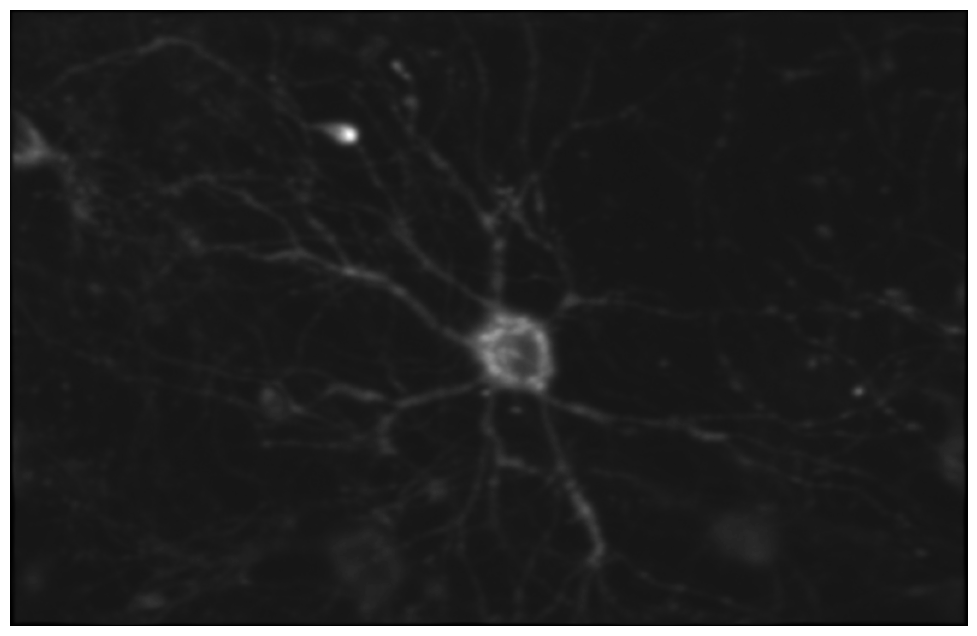

In [ ]:
# Sum along axis 0
sum_axis0 = np.sum(concatenated_videos, axis=0)

display_image(sum_axis0)

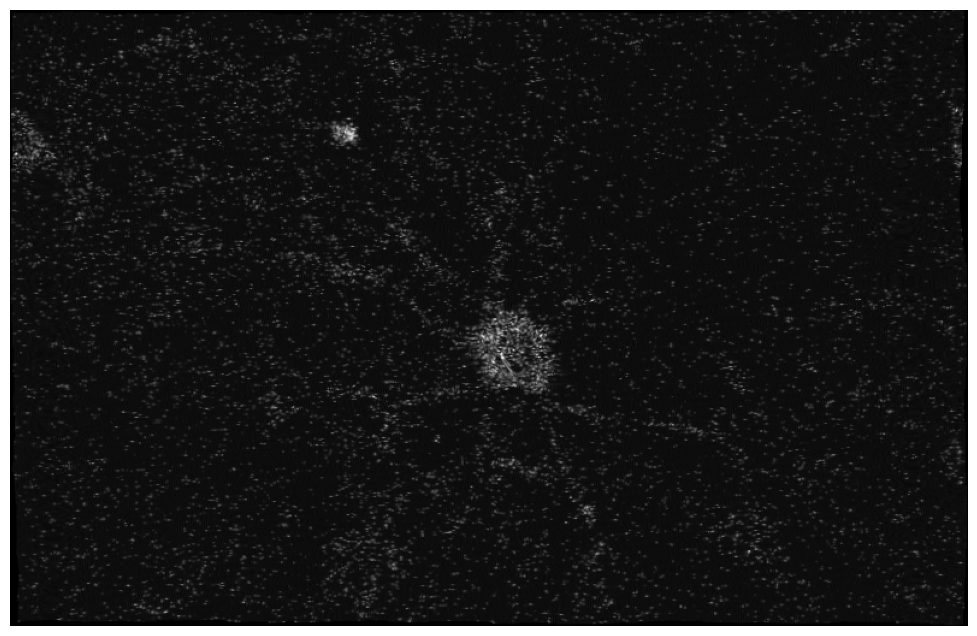

Elapsed time: 1566.84681224823 seconds


In [ ]:
# video = video_green
video = concatenated_videos

display_video(video)

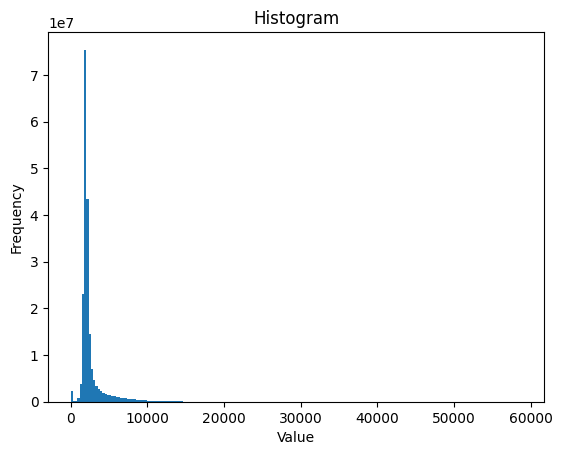

In [ ]:
# Calculate the maximum and minimum values
max_value = np.max(video)
min_value = np.min(video)

# Create an array of bin edges
infinitesimal = np.finfo(np.float64).eps
bins = np.linspace(min_value-infinitesimal, max_value+infinitesimal, num=201)
# bin with x length means x-1 intervals for histogram

# Flatten the 3D matrix into a 1D array
flattened_data = video.flatten()

# Plot the histogram
plt.hist(flattened_data, bins=bins)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the histogram
plt.show()

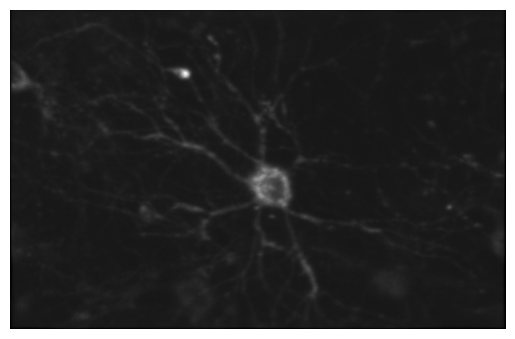

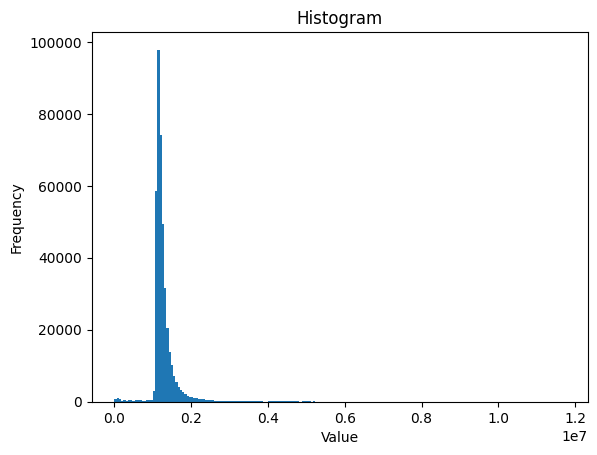

Bin Edges: [2.63000000e+03 6.13317200e+04 1.20033440e+05 1.78735160e+05
 2.37436880e+05 2.96138600e+05 3.54840320e+05 4.13542040e+05
 4.72243760e+05 5.30945480e+05 5.89647200e+05 6.48348920e+05
 7.07050640e+05 7.65752360e+05 8.24454080e+05 8.83155800e+05
 9.41857520e+05 1.00055924e+06 1.05926096e+06 1.11796268e+06
 1.17666440e+06 1.23536612e+06 1.29406784e+06 1.35276956e+06
 1.41147128e+06 1.47017300e+06 1.52887472e+06 1.58757644e+06
 1.64627816e+06 1.70497988e+06 1.76368160e+06 1.82238332e+06
 1.88108504e+06 1.93978676e+06 1.99848848e+06 2.05719020e+06
 2.11589192e+06 2.17459364e+06 2.23329536e+06 2.29199708e+06
 2.35069880e+06 2.40940052e+06 2.46810224e+06 2.52680396e+06
 2.58550568e+06 2.64420740e+06 2.70290912e+06 2.76161084e+06
 2.82031256e+06 2.87901428e+06 2.93771600e+06 2.99641772e+06
 3.05511944e+06 3.11382116e+06 3.17252288e+06 3.23122460e+06
 3.28992632e+06 3.34862804e+06 3.40732976e+06 3.46603148e+06
 3.52473320e+06 3.58343492e+06 3.64213664e+06 3.70083836e+06
 3.75954008e+

In [ ]:
# Sum along axis 0
sum_axis0 = np.sum(video, axis=0)

display_image(sum_axis0)

plt.figure()
max_value = np.max(sum_axis0)
min_value = np.min(sum_axis0)
infinitesimal = np.finfo(np.float64).eps
bins = np.linspace(min_value-infinitesimal, max_value+infinitesimal, num=201)
flattened_data = sum_axis0.flatten()
hist_values, bin_edges, _ =plt.hist(flattened_data, bins=bins)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()
print("Bin Edges:", bin_edges)
print("Histogram Values:", hist_values)

In [ ]:
# threshold = 1.00055924e+06*2

# sum_axis0_new = np.where(sum_axis0 > threshold, 1, 0)

# fig, ax = plt.subplots()
# ax.imshow(sum_axis0_new, cmap='gray') # map to 0 to 1 for images
# ax.axis('off')
# plt.show()


# Apply Gaussian blur to reduce noise (optional but recommended)
blurred_image = cv2.GaussianBlur(sum_axis0, (3, 3), 0)

threshold1 = 100
threshold2 = 150

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1, threshold2)

# Display the original image and the detected edges
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(x, cmap='gray')
ax1.set_title('Gray Image')
ax1.axis('off')

ax2.imshow(edges, cmap='gray')
ax2.set_title('Detected Edges')
ax2.axis('off')

plt.show()

error: ignored

## Example code

### Calcualting the mean, var, std and covar

In [ ]:
# Sample data
data = np.array([1, 2, 3, 4, 5])

# Calculate the mean
mean = np.mean(data)
print("Mean:", mean)

# Calculate the variance (using n)
variance_n = np.var(data)
print("Variance (n):", variance_n)

# Calculate the variance (using n-1)
variance_n_1 = np.var(data, ddof=1)
print("Variance (n-1):", variance_n_1)

# Calculate the standard deviation (using n)
std_n = np.std(data)
print("Standard Deviation (n):", std_n)

# Calculate the standard deviation (using n-1)
std_n_1 = np.std(data, ddof=1)
print("Standard Deviation (n-1):", std_n_1)

Mean: 3.0
Variance (n): 2.0
Variance (n-1): 2.5
Standard Deviation (n): 1.4142135623730951
Standard Deviation (n-1): 1.5811388300841898


In [ ]:
# Create a 2D array of data with different row and column numbers
data = np.array([[1, 2, 3], [4, 5, 6]]) # m by n matrix, m rows and n columns

# Calculate the covariance matrix with rowvar=False (using n-1)
covariance_matrix_n_1 = np.cov(data, rowvar=False)
# By setting rowvar=False, we indicate that each column represents a variable and each row represents an observation.
# Then the output is n by n (n is the number of columns).
# Otherwise, rowvar=True means each row represents a variable and each column represents an observation.
# Then the output is m by m (m is the number of rows).

# Calculate the covariance matrix with rowvar=False (using n)
covariance_matrix_n = np.cov(data, rowvar=False, bias=True)

# Print the covariance matrix
print("Covariance (n-1):", covariance_matrix_n_1)
print("Covariance (n):", covariance_matrix_n)

Covariance (n-1): [[4.5 4.5 4.5]
 [4.5 4.5 4.5]
 [4.5 4.5 4.5]]
Covariance (n): [[2.25 2.25 2.25]
 [2.25 2.25 2.25]
 [2.25 2.25 2.25]]


### Creating tiff files

In [ ]:
# Create a numpy array with your data
data = np.random.randint(0, 255, size=(512, 512), dtype=np.uint8) # gray image

# Save the numpy array as a TIFF file
tiff.imwrite('output_1.tif', data)

In [ ]:
# Create a numpy array with your 3D data
data = np.random.randint(0, 255, size=(3, 512, 512), dtype=np.uint8) # grb image

# Save the numpy array as a 3D TIFF file
tiff.imwrite('output_2.tif', data)

In [ ]:
# Create a numpy array with your 3D float data
data = np.random.rand(2, 512, 512) * 100.0  # Example: random float values between 0 and 100

# Save the numpy array as a 3D TIFF file
tiff.imwrite('output_3.tif', data)